### Жеглов Глеб 
#### 19-ИВТ-2
### Вариант 11 
#### 2 | 1, 2

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
AirQuality = pd.read_csv ("AirQualityUCI.csv", sep=';')
AirQuality

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.76
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.73
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.75
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.79
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.76
9353,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.71
9354,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.64
9355,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.51


### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных.
#### Информация об атрибутах:

**1. CO(GT)** Истинная почасовая усредненная концентрация CO в мг/м^3 (эталонный анализатор)

**2. PT08.S1(CO)** (оксид олова) Почасовая усредненная реакция датчика (номинально нацеленная на CO)

**3. NMHC(GT** Истинная почасовая усредненная общая концентрация неметанических углеводородов в мкг/м^3 (эталонный анализатор)

**4. C6H6(GT)** Истинная почасовая усредненная концентрация бензола в мкг/м^3 (эталонный анализатор)

**5. PT08.S2(NMHC)** (titania) Почасовая усредненная реакция датчика (номинально нацеленная на NMHC)

**6. NOx(GT)** Истинная почасовая усредненная концентрация NOx в ppb (эталонный анализатор)

**7. PT08.S3(NOx)** (оксида вольфрама) Осредненный отклик датчика (номинально Nох таргетированный)

**8. NO2(GT)** (tungsten oxide) Усредненный по часам отклик датчика (номинально NOx)

**10. PT08.S4(NO2)** (оксида вольфрама) Осредненный отклик датчика (номинально NО2 таргетированный)

**11. PT08.S5(O3)** (оксида индия) Почасовой усредненный отклик датчика (номинально О3 целевых)

**12. T** Температура в ° C

**13. RH** Относительная влажность (%)

**14. AH** Абсолютная влажность


### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.

In [3]:
AirQuality.shape

(9357, 13)

In [4]:
AirQuality.drop_duplicates(inplace = True)
AirQuality.shape

(9326, 13)

Повторяющиеся строчки отсутствуют 

### 3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию.

Выделяю категориальные и количественные(числовые) признаки

In [5]:
numerical_columns = [i for i in AirQuality.columns[0:13] if AirQuality[i].dtype.name != 'object']
categorial_columns = [i for i in AirQuality.columns[0:13] if AirQuality[i].dtype.name == 'object']

In [6]:
print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
categorial:  []


<AxesSubplot:>

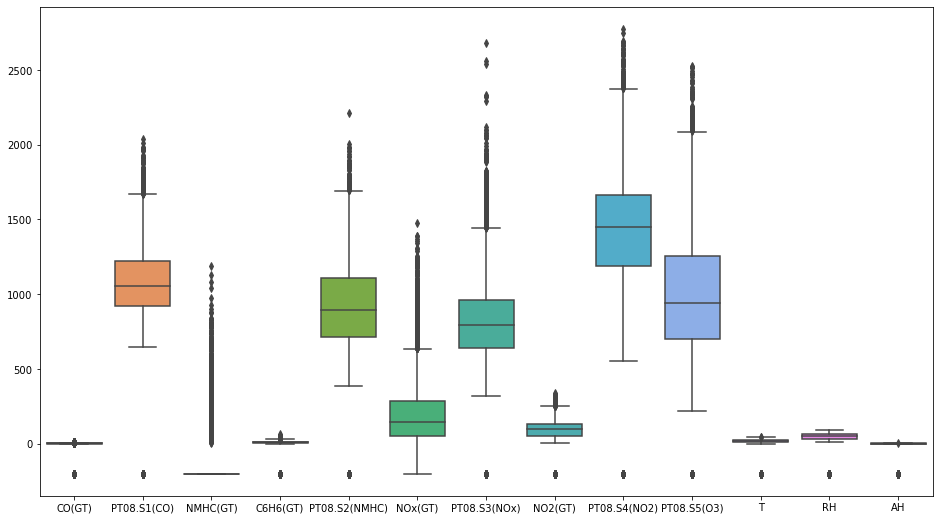

In [7]:
plt.figure(figsize=(16,9))
sns.boxplot(data = AirQuality[numerical_columns])

Способ масштабирования - нормализация

<AxesSubplot:>

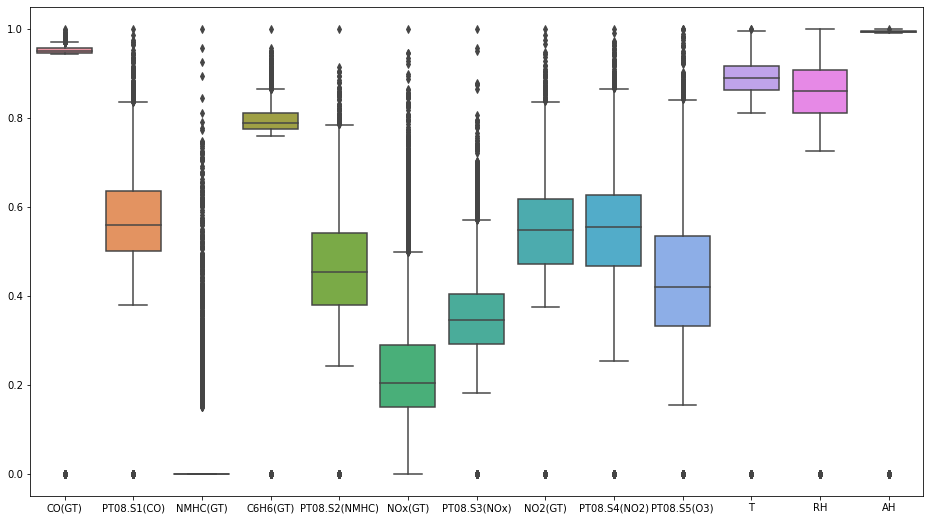

In [8]:
scaler = preprocessing.MinMaxScaler()
AirQuality[numerical_columns] = scaler.fit_transform(AirQuality[numerical_columns])
plt.figure(figsize=(16,9))
sns.boxplot(data = AirQuality[numerical_columns])

### 4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

### 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

<AxesSubplot:>

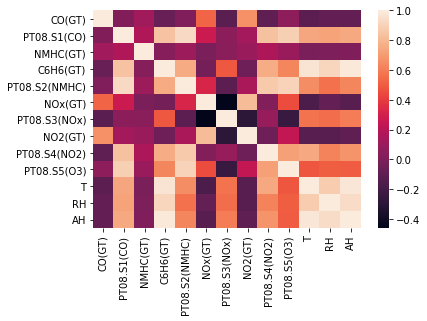

In [9]:
sns.heatmap(AirQuality.corr())

### 6. Заполните пропущенные значения в данных;

In [10]:
AirQuality.shape

(9326, 13)

In [11]:
AirQuality.count()

CO(GT)           9326
PT08.S1(CO)      9326
NMHC(GT)         9326
C6H6(GT)         9326
PT08.S2(NMHC)    9326
NOx(GT)          9326
PT08.S3(NOx)     9326
NO2(GT)          9326
PT08.S4(NO2)     9326
PT08.S5(O3)      9326
T                9326
RH               9326
AH               9326
dtype: int64

### 7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.¶

Поделим данные для обучения и теста

In [12]:
X = AirQuality.drop(['CO(GT)'], axis=1)
Y = AirQuality['CO(GT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

print(X_train.shape)
print(X_test.shape)

(6528, 12)
(2798, 12)


#### Линейная регрессия без использования регуляризаторов

In [13]:
reg = LinearRegression(n_jobs=-1)
reg.fit(X_train, Y_train)
reg_pred = reg.predict(X_test)

In [14]:
print('Средняя квадратичная ошибка = %8.5f' %mean_squared_error(reg_pred, Y_test))
print('Корень из средней квадратичной ошибки = %8.5f' %mean_squared_error(reg_pred, Y_test, squared=False))
print('Cредняя абсолютная ошибка = %8.5f' %mean_absolute_error(reg_pred, Y_test))
print()

print('Коэффициент корреляции Пирсона: %8.6f' %pearsonr(reg_pred, Y_test)[0])
print('p-value:', pearsonr(reg_pred, Y_test)[1])
print()

print('Коэффициент корреляции Спирмена: %8.6f' %spearmanr(reg_pred, Y_test)[0])
print('p-value:', spearmanr(reg_pred, Y_test)[1])

Средняя квадратичная ошибка =  0.06734
Корень из средней квадратичной ошибки =  0.25950
Cредняя абсолютная ошибка =  0.16469

Коэффициент корреляции Пирсона: 0.698291
p-value: 0.0

Коэффициент корреляции Спирмена: 0.646044
p-value: 0.0


#### Линейная регрессия, LASSO регуляризатор

In [15]:
lasso = LassoCV(alphas = np.arange(0.001, 10, 0.05), n_jobs=-1)
lasso.fit(X_train, Y_train)
print('Лучшее значение альфа:', lasso.alpha_)
lasso_pred = lasso.predict(X_test)

Лучшее значение альфа: 0.001


In [16]:
print('Средняя квадратичная ошибка = %8.5f' %mean_squared_error(lasso_pred, Y_test))
print('Корень из средней квадратичной ошибки = %8.5f' %mean_squared_error(lasso_pred, Y_test, squared=False))
print('Cредняя абсолютная ошибка = %8.5f' %mean_absolute_error(lasso_pred, Y_test))
print()

print('Коэффициент корреляции Пирсона: %8.6f' %pearsonr(lasso_pred, Y_test)[0])
print('p-value:', pearsonr(lasso_pred, Y_test)[1])
print()
print('Коэффициент корреляции Спирмена: %8.6f' %spearmanr(lasso_pred, Y_test)[0])
print('p-value:', spearmanr(lasso_pred, Y_test)[1])

Средняя квадратичная ошибка =  0.06846
Корень из средней квадратичной ошибки =  0.26164
Cредняя абсолютная ошибка =  0.16844

Коэффициент корреляции Пирсона: 0.692388
p-value: 0.0

Коэффициент корреляции Спирмена: 0.682186
p-value: 0.0


Вывод: Значение p-value получилось крайне мало, примерно равно 0. Предсказанные и тестовые значения корреллируют, значение по Пирсону и Спрмену примерно равны ~ 0,69. Следовательно линейная регрессия справилась со своей задачей